# Ejercicios introducción a Julia 

## Ejercicio 1: 
Crear un vector aleatorio de 20 entradas usando la función `rand` y luego ordenarlo utilizando `sort!`, y luego reordenarlo en orden decreciente con `reverse!`. Luego, haga una copia de ese vector y asegurese de que la copia no esta referenciada al vector original

In [2]:
ran_vec = zeros(20)
for i in 1:20
    ran_vec[i] = rand()
end
println(ran_vec)
order_vec = sort!(ran_vec)
println(order_vec)
reverse_vec = reverse!(ran_vec)
println(reverse_vec)

[0.6766013991703569, 0.14076302532530305, 0.8443439385872699, 0.5086730103982452, 0.7578652859668975, 0.20777897849537708, 0.06689673763439352, 0.13138845959821532, 0.4621797756824819, 0.2936047436291914, 0.3293726573970779, 0.3582142592826313, 0.2268814841673109, 0.6083715882493899, 0.9656463953255335, 0.8073099358620519, 0.005914480835664926, 0.5176254685145627, 0.9645039628072708, 0.7360224598817471]
[0.005914480835664926, 0.06689673763439352, 0.13138845959821532, 0.14076302532530305, 0.20777897849537708, 0.2268814841673109, 0.2936047436291914, 0.3293726573970779, 0.3582142592826313, 0.4621797756824819, 0.5086730103982452, 0.5176254685145627, 0.6083715882493899, 0.6766013991703569, 0.7360224598817471, 0.7578652859668975, 0.8073099358620519, 0.8443439385872699, 0.9645039628072708, 0.9656463953255335]
[0.9656463953255335, 0.9645039628072708, 0.8443439385872699, 0.8073099358620519, 0.7578652859668975, 0.7360224598817471, 0.6766013991703569, 0.6083715882493899, 0.5176254685145627, 0.508

## Ejercicio 2: 
Crear una rutina que calcule las raíces de la siguiente ecuación trascendental (como función de $A$ y con una tolerancia $\epsilon$ , es decir, que el cambio entre el último y penúltimo resultado sea igual o menor a $\epsilon$): 
$$
x \tan{x}=\sqrt{A-x^2},
$$
esta ecuación tiene interes en la física cuántica de particulas en una dimensión, en particular, sus soluciones estan directamente relacionadas con las eigenenergias del _pozo finito cuadrado_, y el número de soluciones posibles es precisamente el número de _estados ligados o acotados_ que caben en el pozo.
- Usar varias condiciones iniciales para encontrar todas las raíces en un rango considerable (Por ejemplo entre -10 y 10).
- Graficar la función y las raíces encontradas.

Raíces encontradas: Any[-3.727134687994569, -1.2804218631112423, 3.727134687994569, 1.2804218631112456]


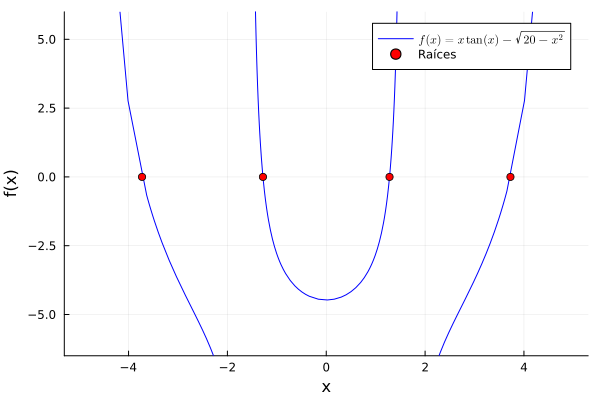

In [12]:
using Plots
using LaTeXStrings
using MTH229

function f(x, A)
    return x * tan(x) - sqrt(A - x^2)
end

function Raiz(x_0, A, tol, max_iter=1000)
    x = x_0
    for i in 1:max_iter
        fx = f(x, A)
        f_prime = tan(x) + x * sec(x)^2 + x / sqrt(A - x^2)
        x = x - fx/f_prime
        if abs(fx) < tol
            #println("Converge en la iteración $i.")
            return x
        end
    end
    println("El método no converge en $max_iter iteraciones.")
end

function Soluciones(A, rango, tol)
    raices = []
    for x_0 in rango
        try
            raiz = Raiz(x_0, A, tol)
            if all(abs(raiz - r) > tol for r in raices)
                push!(raices, raiz)
            end
        catch
            # Ignorar errores de dominio o división por cero
        end
    end
    return raices
end

# Parámetros
A = 20.0
rango = -10:0.1:10
tol = 1e-6

# Encontrar y graficar las raíces
raices = Soluciones(A, rango, tol)
println("Raíces encontradas: ", raices)

f(x) = x * tan(x) - sqrt(A - x^2)
# Graficar la función
plot(rangeclamp(f),-5,5, label=L"f(x) = x \tan(x) - \sqrt{20 - x^2}", color="blue")
scatter!(raices, [0 for r in raices], label="Raíces", color="red")
ylims!(-6.5, 6)
xlabel!("x")
ylabel!("f(x)")



Otra forma de visualizar las soluciones a: $x\tan{x}=\sqrt{A-x^2}$

Para graficar las referencias siguientes son útiles
- https://mth229.github.io/graphing.html
- https://aprendeconalf.es/manual-julia/graficos.html
- https://docs.juliaplots.org/dev/tutorial/

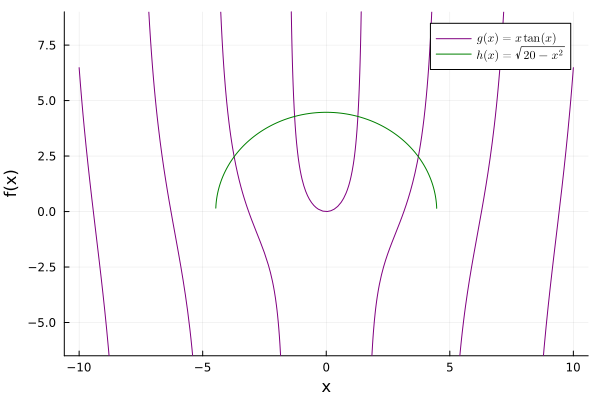

In [11]:
g(x)=x*tan(x)
h(x)=sqrt(A-x^2)
plot(rangeclamp(g),-10,10, label=L"g(x) = x \tan(x)", color="purple")
plot!(rangeclamp(h),-10,10, label=L"h(x) = \sqrt{20 - x^2}", color="green")
ylims!(-6.5, 9)
xlabel!("x")
ylabel!("f(x)")

## Ejercicio 3:
Crear una rutina que busque raíces de cualquier función, usando el método de Newton. Para la parte de la derivada utilice la derivada numérica. La función entonces debe depender de la diferencia finíta que utilicen.


- ¿El método converge a las raíz? (pruebe con varias funciones, tales como $x^2 - 4$, etc.)
- Para analizar el punto anterior, estudie la convergencia para varias condiciones iniciales y grafique en cuantos pasos se llega a la raíz dada una tolerancia $\epsilon$ y respecto a la diferencia finita utilizada. Es decir, grafique $N(\Delta x)$ donde $N$ es el número de pasos necesarios para llegar a la raíz, $\Delta x$ es la diferencia finita. Puede hacerlo para cada condición inicial o calcular el promedio.

In [19]:
function Newton_Raphson(f, x0, h, tol, maxIter = 1000)
    fp(x) = (f(x+h) - f(x))/h   # forward numerical derivative 
    x = x0
    fx = f(x0)
    fp = fp(x0)
    iter = 0
    while abs(fx) > tol && iter < maxIter
        x = x  - fx/fp   
        fx = f(x)           # Precompute f(x)
        iter += 1
    end
    return x
end

f(x) = x^2 - 4
Newton_Raphson(f, 1.0, 1e-10, 1e-6)

1.9550515942129125